<a href="https://colab.research.google.com/github/Wisley1/DataCon2023/blob/stat_analysis/stat_analysisV1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


**EState_VSA** (EState Van der Waals Surface Area): Это модуль основан на методе E-State Fragments и предоставляет информацию о поверхностной площади молекулы, взаимодействующей с ван-дер-ваальсовыми радикалами.

**VSA_EState1-VSA_EState10**: Эти модули также основаны на методе E-State Fragments и представляют собой дескрипторы, описывающие различные виды поверхности молекулы и их взаимодействие с различными типами атомов.

**FractionCSP3**: Этот дескриптор указывает на долю сп^3-гибридизованных углеродных атомов в молекуле.


**NumAliphaticCarbocycles, NumAliphaticHeterocycles, NumAliphaticRings, NumAromaticCarbocycles, NumAromaticHeterocycles, NumAromaticRings:** Эти дескрипторы отражают количество и тип алифатических и ароматических циклов в молекуле.

**NumHAcceptors:** Этот дескриптор указывает на количество акцепторов водородной связи в молекуле.

**NumHDonors**: Этот дескриптор указывает на количество доноров водородной связи в молекуле.

**NumHeteroatoms:** **Текст, выделенный полужирным шрифтом** Этот дескриптор указывает на общее количество атомов, отличных от углерода и водорода (гетероатомов), в молекуле.
NumRotatableBonds: Этот дескриптор указывает на количество вращающихся связей в молекуле, то есть связей, которые могут свободно поворачиваться.

**NumSaturatedCarbocycles, NumSaturatedHeterocycles, NumSaturatedRings:** Эти дескрипторы показывают количество и тип насыщенных циклов (циклов без двойных или тройных связей) в молекуле, включая как алифатические, так и ароматические циклы.

**RingCount**: Этот дескриптор указывает на общее количество циклов в молекуле, включая как алифатические, так и ароматические циклы.

**MolLogP:** Этот дескриптор представляет логарифмическое значение коэффициента разделения между октанолом и водой (logP), который используется для оценки гидрофобности молекулы.

**MolMR:** Этот дескриптор представляет собой среднюю молекулярную массу (MolMR), которая характеризует размер и форму молекулы.

In [2]:
df = pd.read_csv('/content/db_v1.csv')

In [3]:
df.head()

,Unnamed: 0,index,Bacteria,NP_Synthesis,Drug,Drug_class_drug_bank,Drug_dose,NP_concentration,NP size_min,NP size_max,...,VSA_EState9,FractionCSP3,NumAliphaticCarbocycles,NumAromaticHeterocycles,NumAromaticRings,NumSaturatedCarbocycles,NumSaturatedHeterocycles,RingCount,MolLogP,MolMR
0,0,0,Micrococcus luteus,green_synthesis from fungus Aspergillus flavus,Vancomycin,Carboxylic acids and derivatives,30.0,100,5.0,30.0,...,1.472309,0.424242,0.0,0.0,5.0,0.0,2.0,12.0,0.1062,349.2917
1,1,1,Micrococcus luteus,green_synthesis from fungus Aspergillus flavus,Gentamicin,Aminoglycosides,10.0,100,5.0,30.0,...,3.492765,1.000000,1.0,0.0,0.0,1.0,2.0,3.0,-3.3275,119.9310
2,2,2,Staphylococcus aureus,green_synthesis using Dioscorea bulbifera tube...,Ceftazidime,Lactams,500.0,30,8.0,20.0,...,0.000000,0.318182,0.0,2.0,2.0,0.0,1.0,4.0,-1.2992,129.5559
3,3,3,Neisseria mucosa,green_synthesis using Dioscorea bulbifera tube...,Ampicillin,Lactams,500.0,30,8.0,20.0,...,0.000000,0.437500,0.0,0.0,1.0,0.0,2.0,3.0,0.3181,89.0289
4,4,4,Neisseria mucosa,green_synthesis using Dioscorea bulbifera tube...,Penicillin,Carboxylic acids and derivatives,500.0,30,8.0,20.0,...,0.000000,0.437500,0.0,0.0,1.0,0.0,2.0,3.0,-3.4699,83.1757


In [28]:
df.shape[1]

45

In [43]:
def distribution(dt, col):
  x = str(col)
  fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (16, 8), sharex=False, sharey=False)
  fig.suptitle(x, fontsize=20)

  ax[0].title.set_text('distribution')
  variable = dt[x].fillna(dt[x].mean())
  sns.histplot(variable, kde=True, element='step', fill=True, alpha=.5, ax=ax[0])
  des = dt[x].describe()
  ax[0].axvline(des["25%"], ls='--')
  ax[0].axvline(des["mean"], ls='--')
  ax[0].axvline(des["75%"], ls='--')
  ax[0].grid(True)
  des = round(des, 2).apply(lambda x: str(x))
  box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "mean: "+des["mean"], "75%: "+des["75%"], "max: "+des["max"]))
  ax[0].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))

  ax[1].title.set_text('outliers')
  tmp_dtf = pd.DataFrame(dt[x])
  tmp_dtf.boxplot(column=x, ax=ax[1])
  plt.show()

Index(['VSA_EState1', 'VSA_EState10', 'VSA_EState7', 'VSA_EState9',
       'FractionCSP3', 'NumAliphaticCarbocycles', 'NumAromaticHeterocycles',
       'NumAromaticRings', 'NumSaturatedCarbocycles',
       'NumSaturatedHeterocycles', 'RingCount', 'MolLogP', 'MolMR'],
      dtype='object')


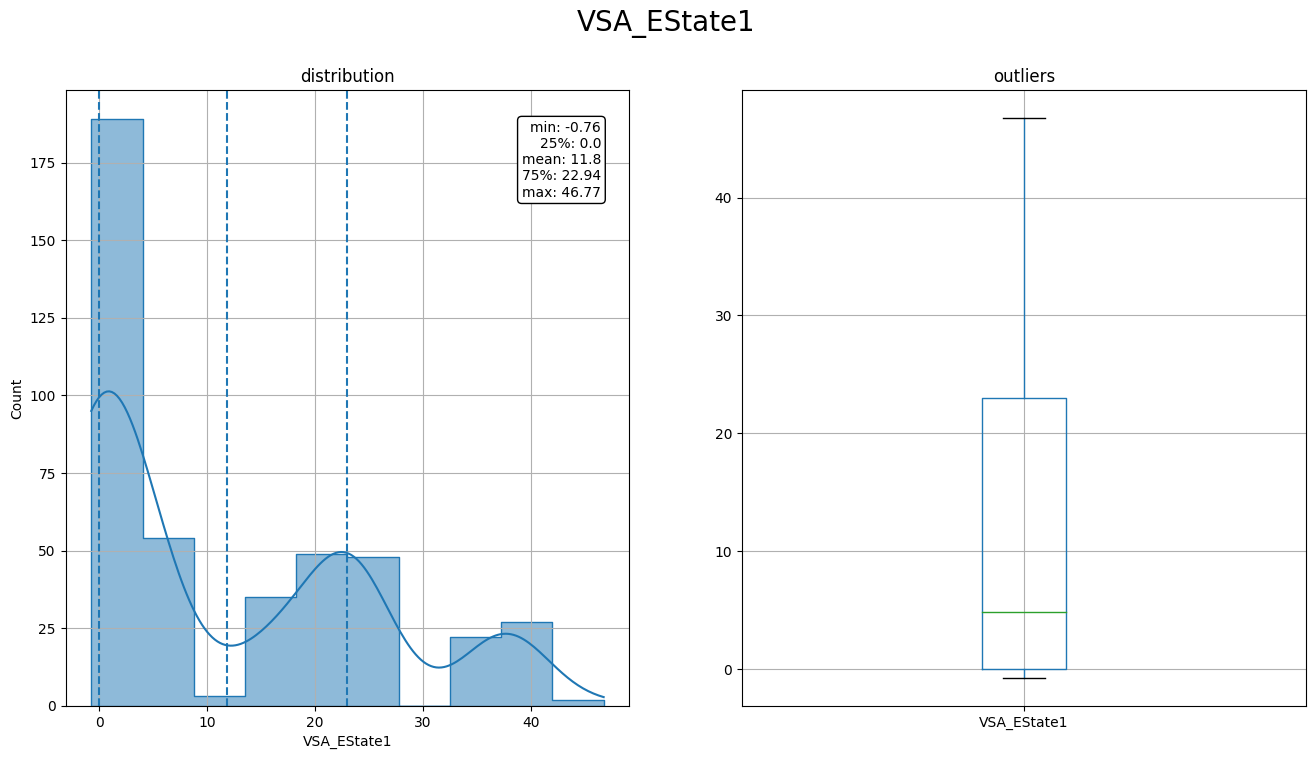

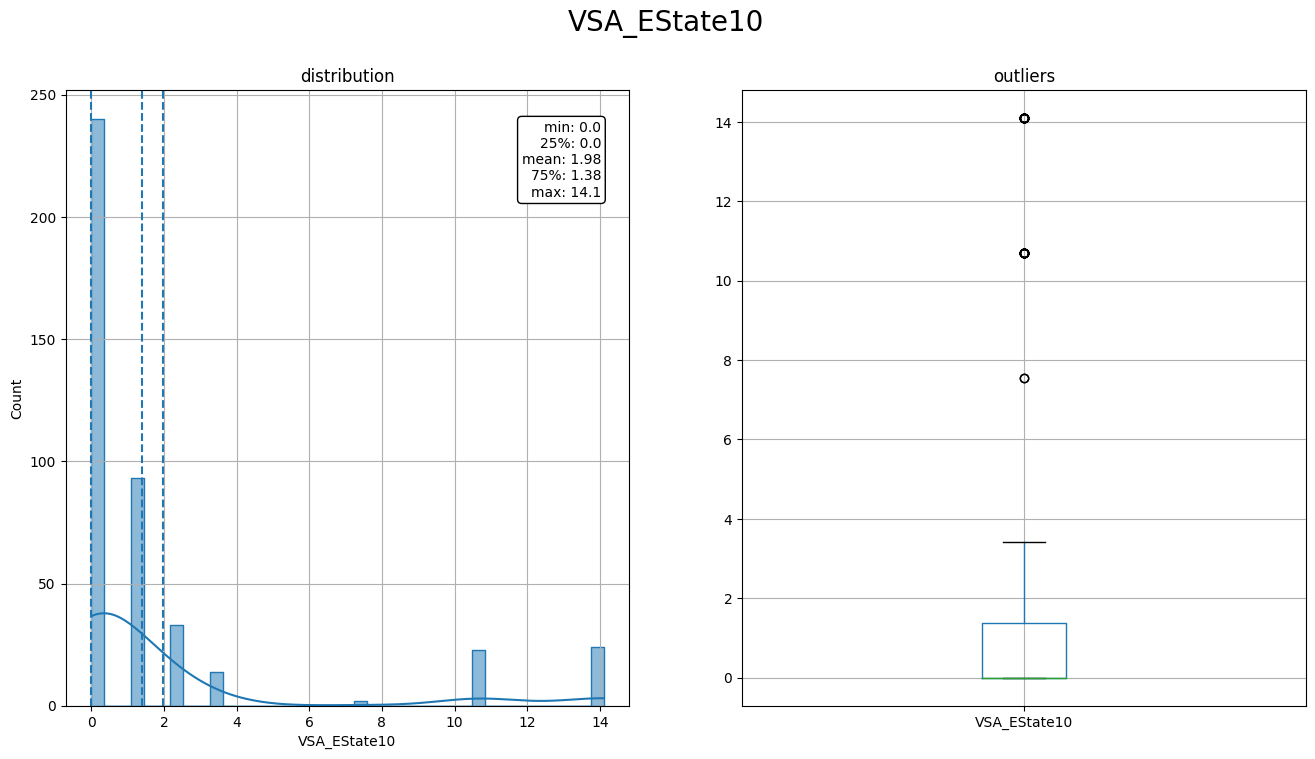

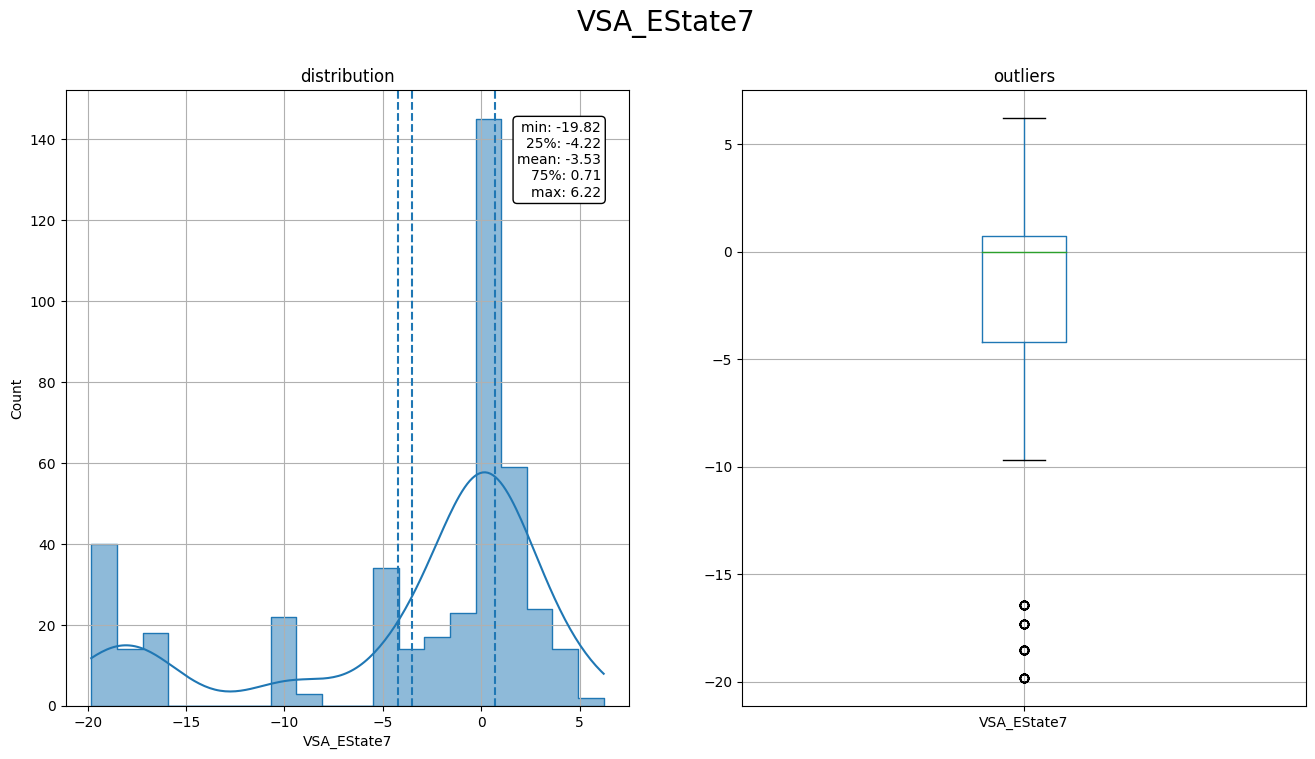

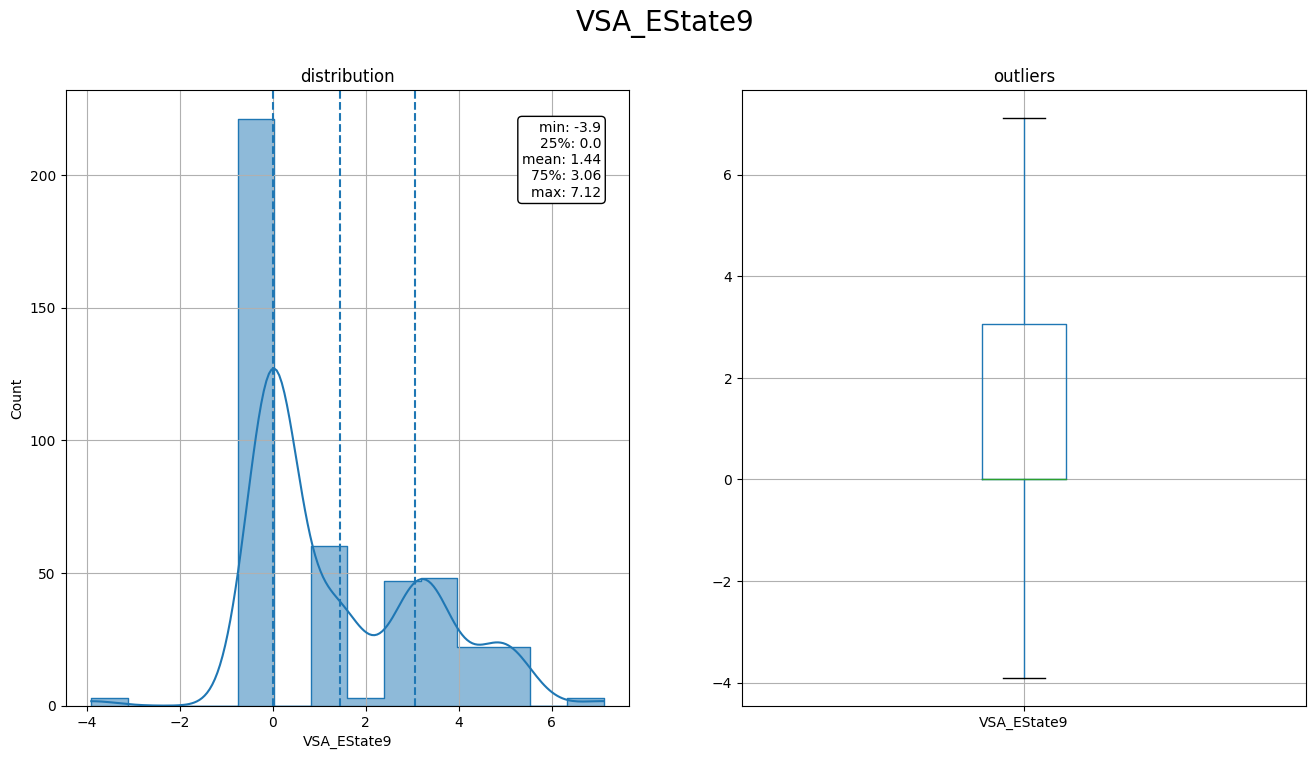

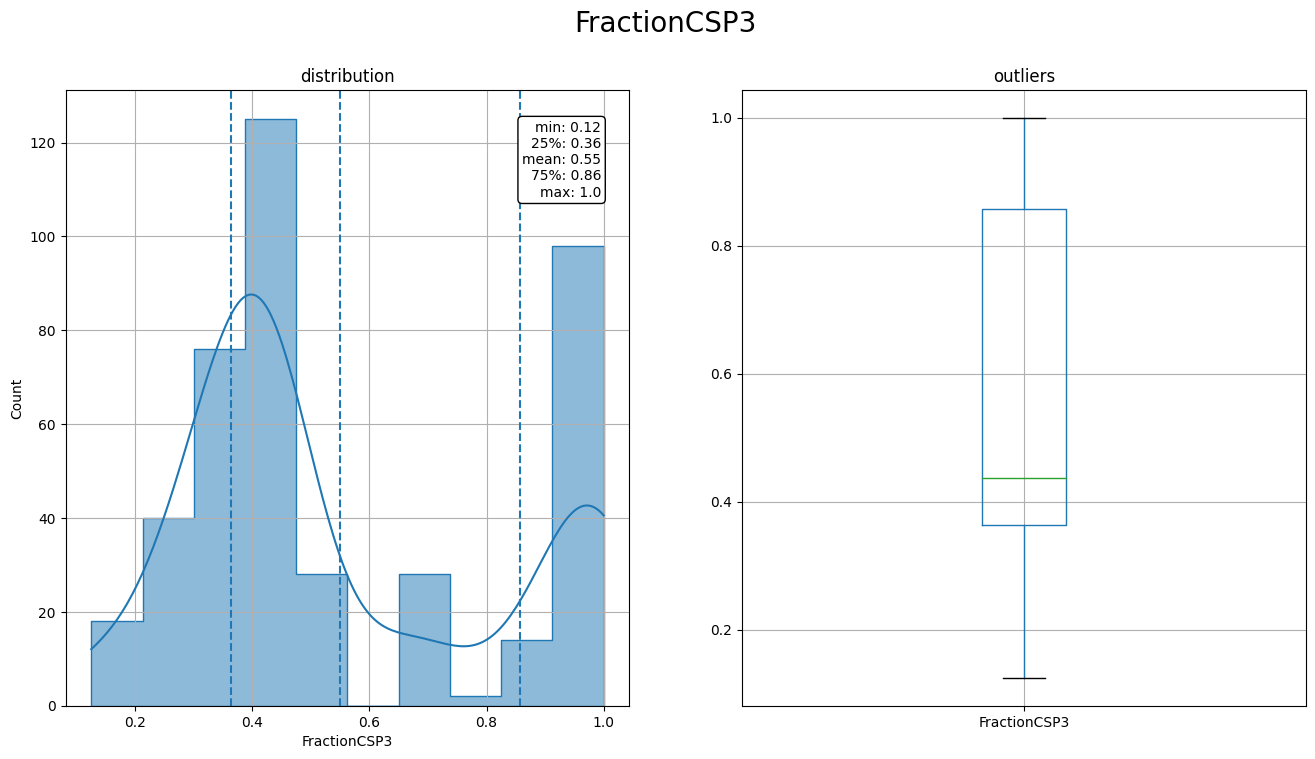

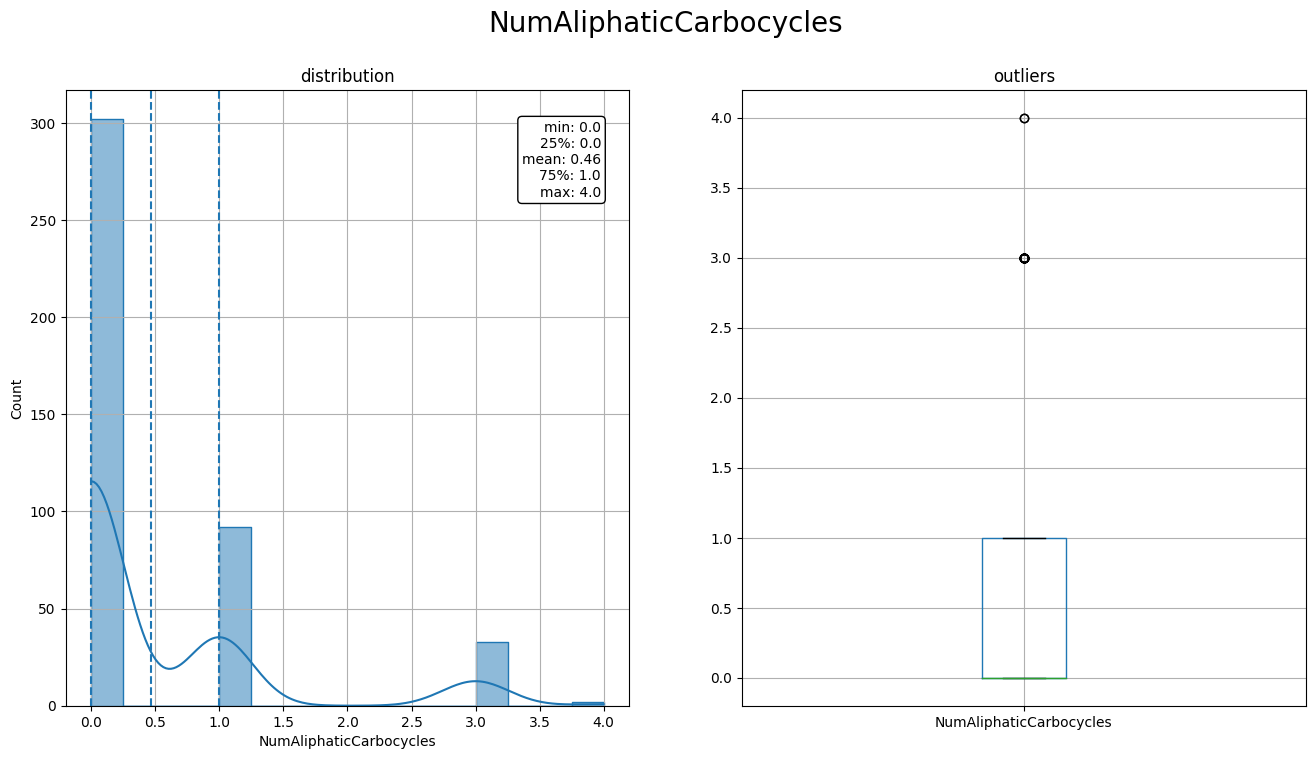

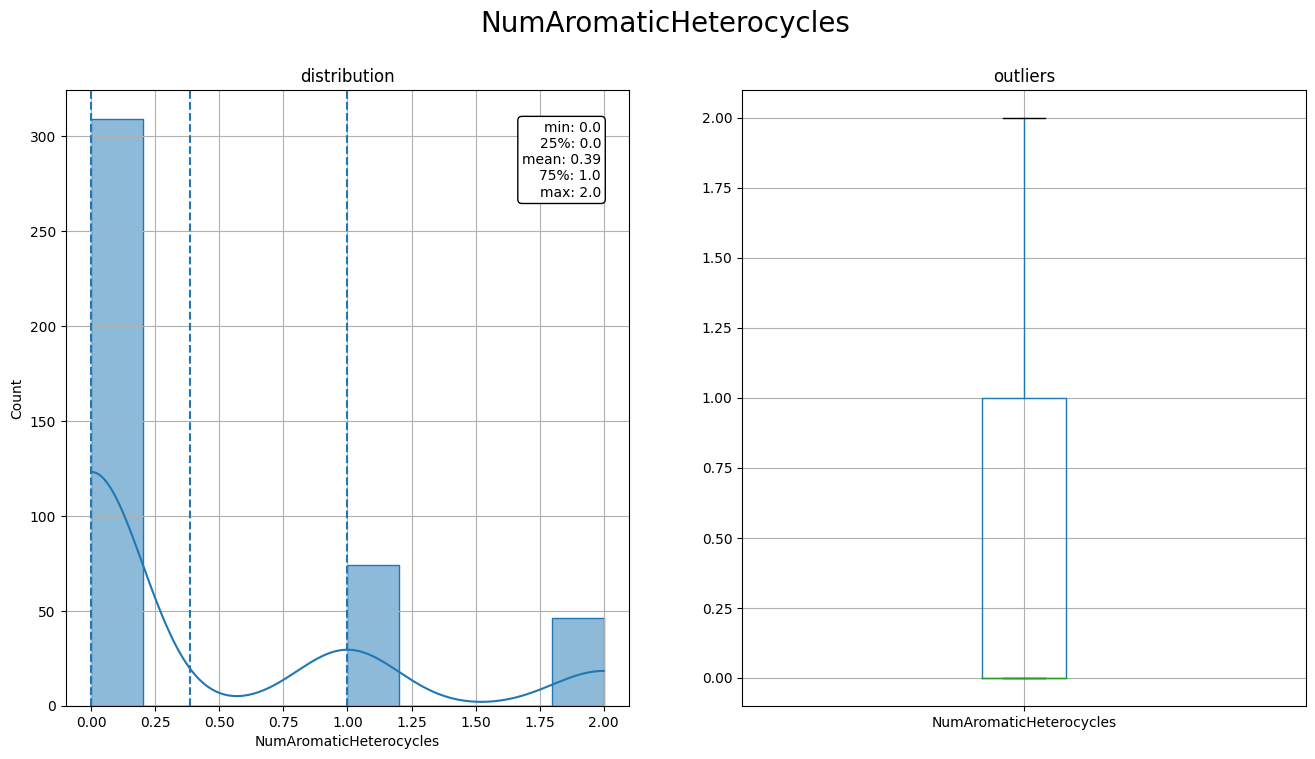

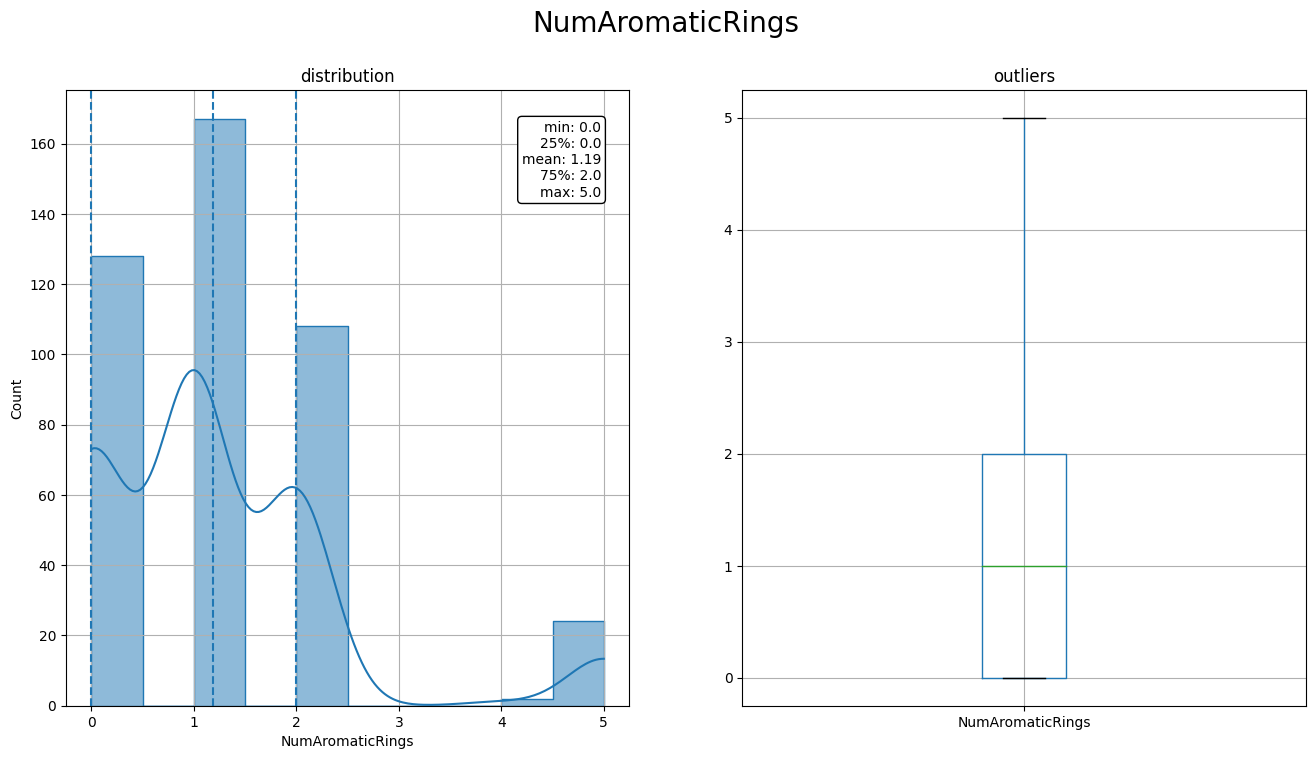

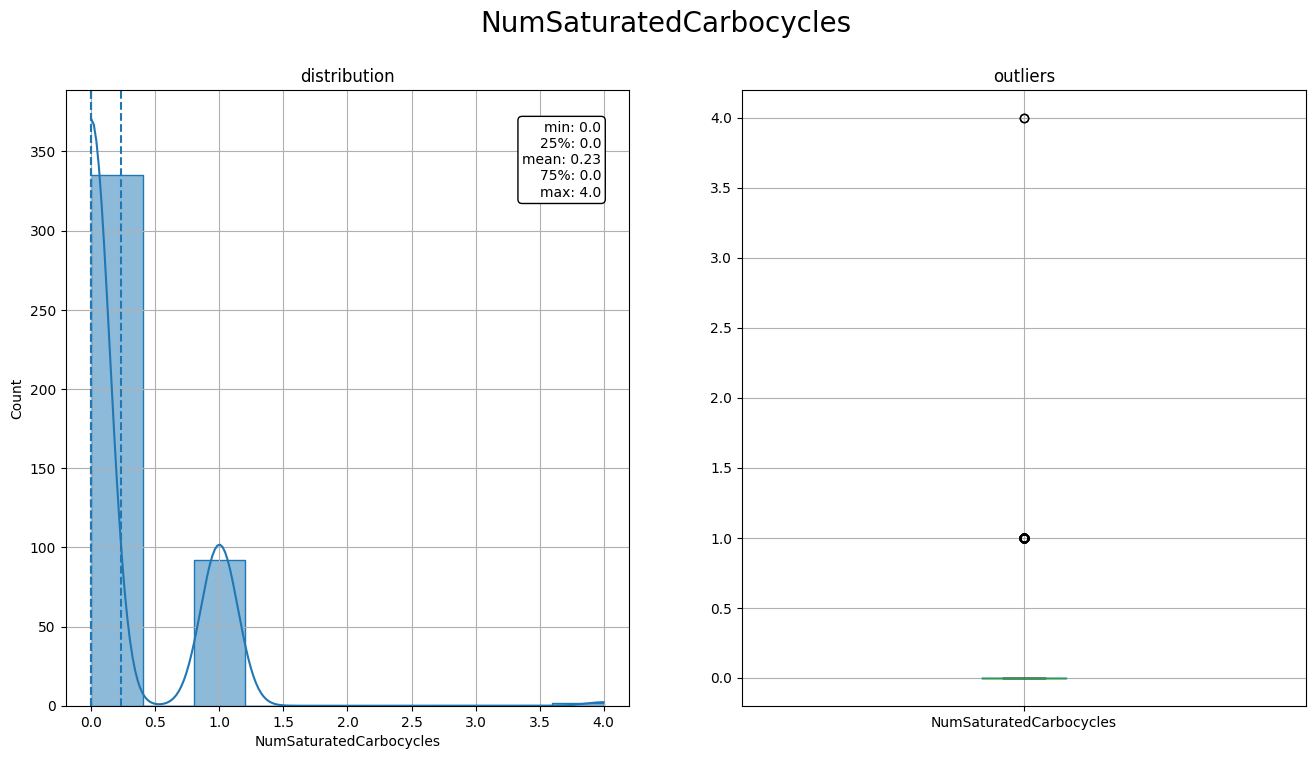

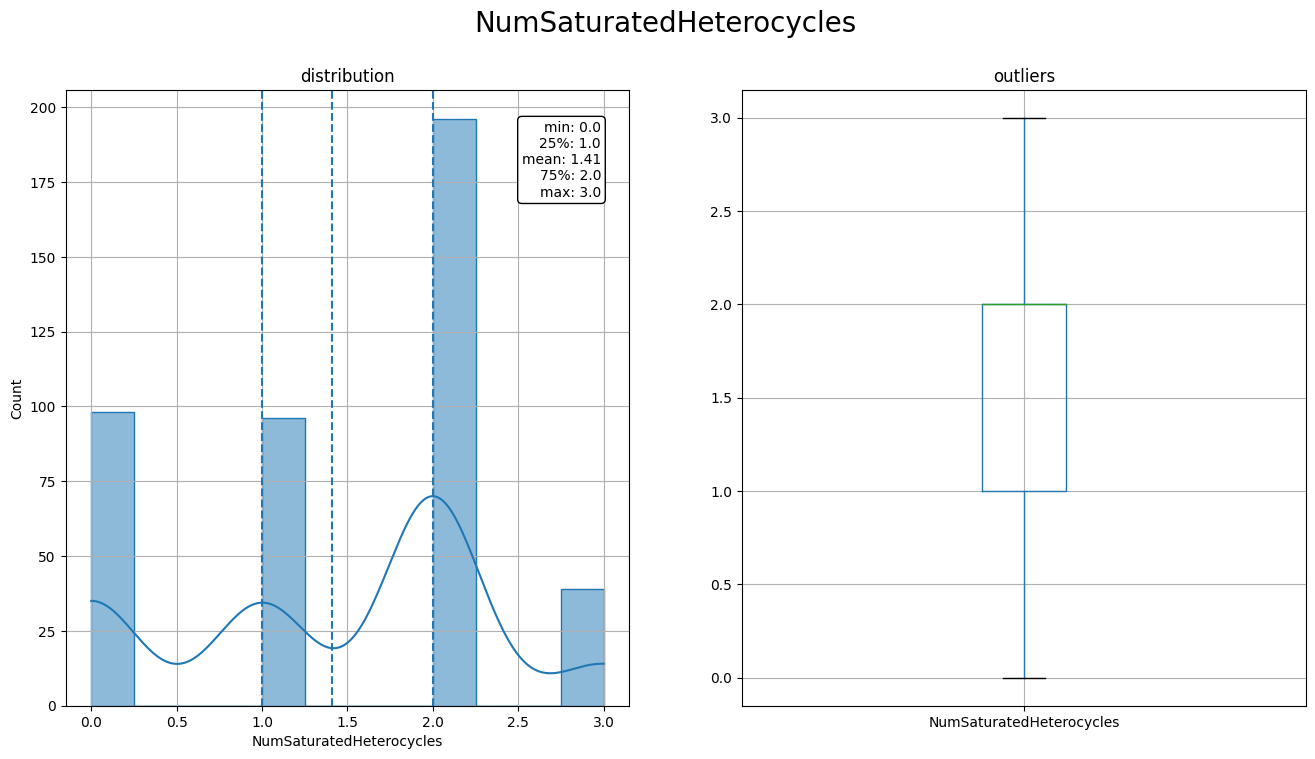

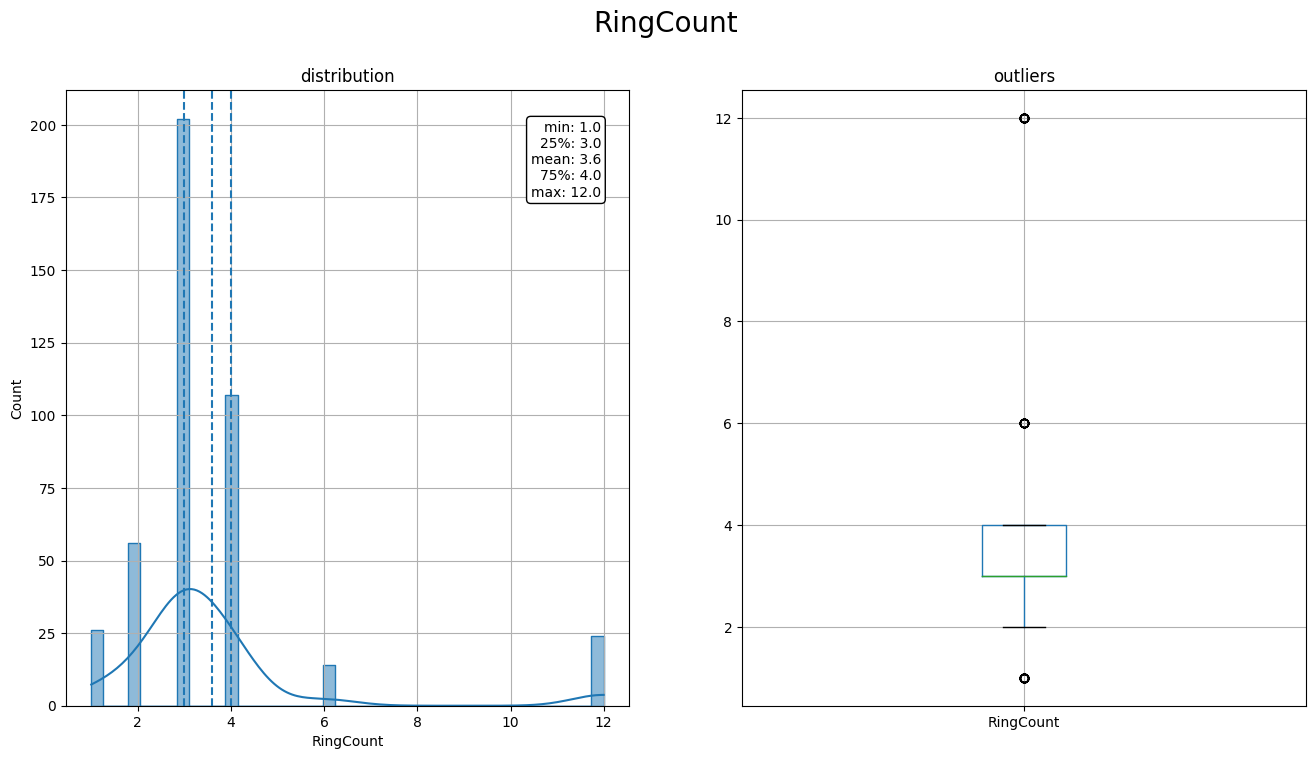

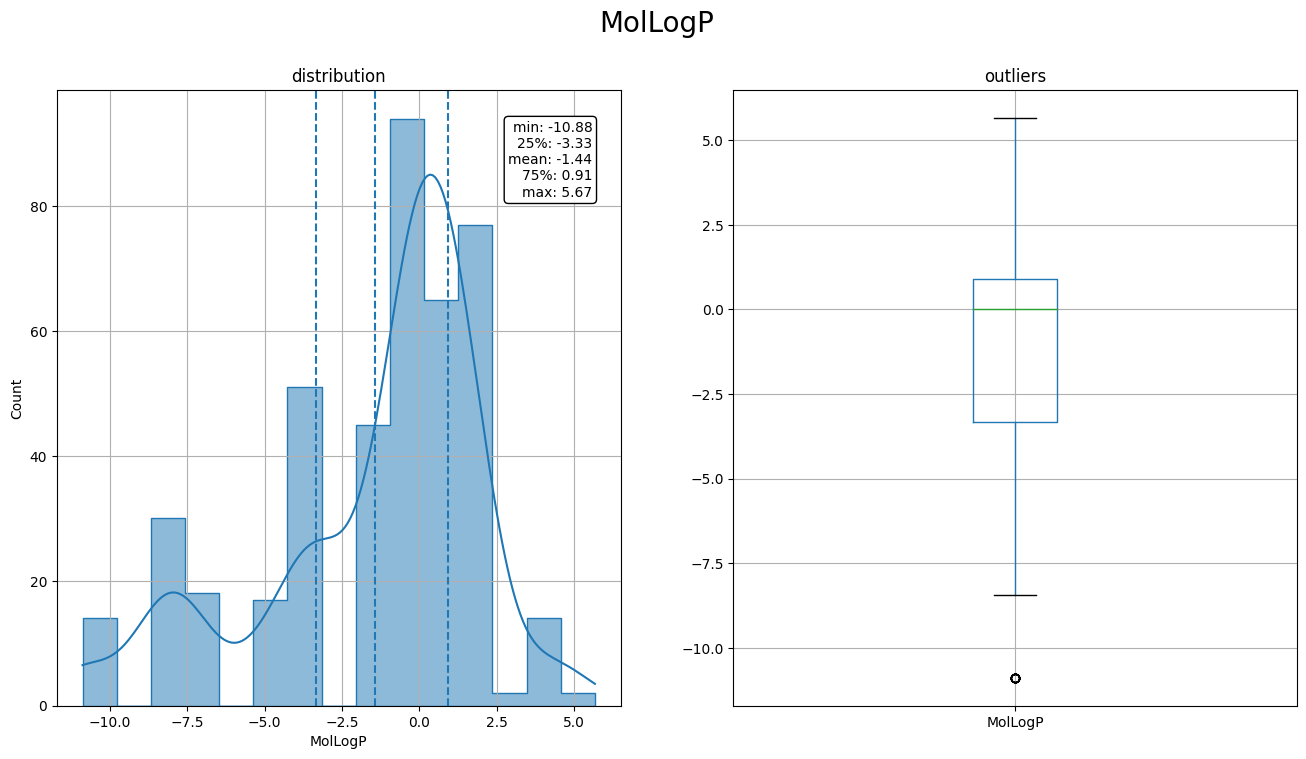

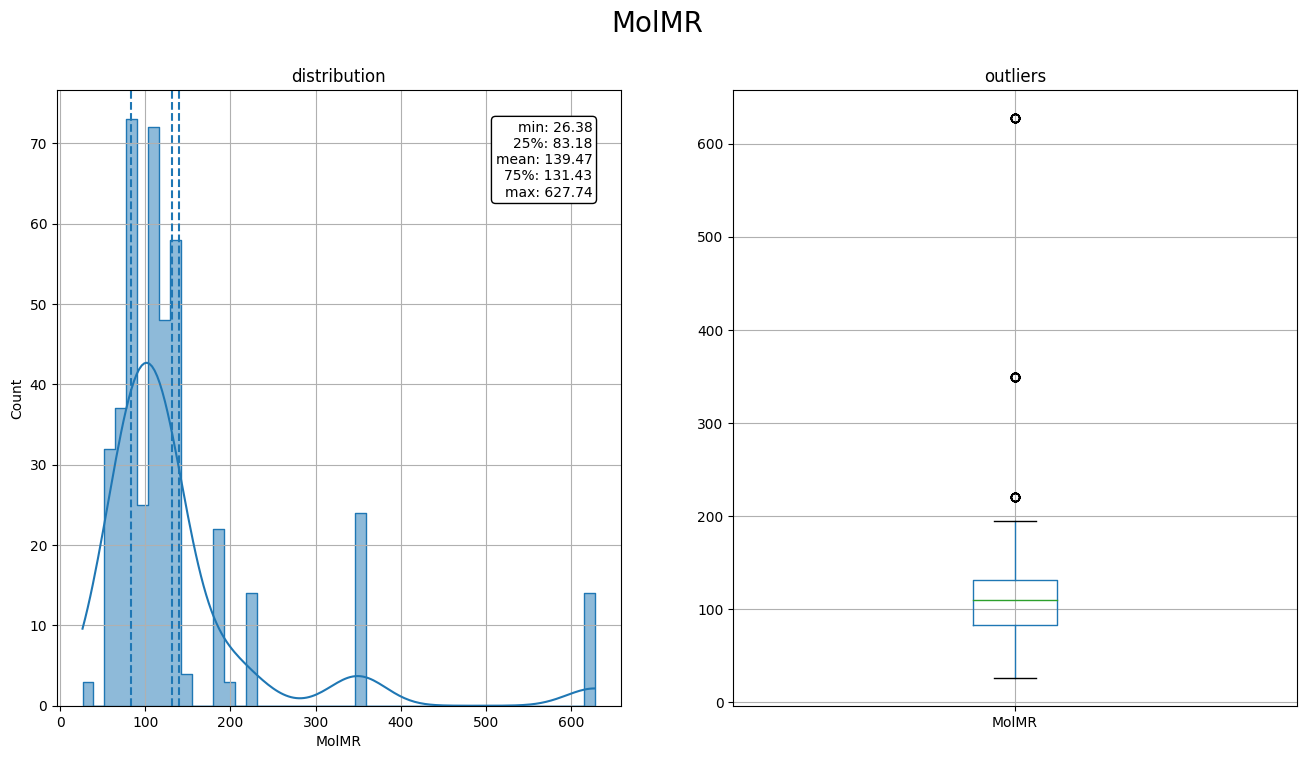

In [44]:
col = df.iloc[:,32:].columns
print(col)
for column in col:
  distribution(df, column)

In [49]:
def detect_outliers(data, threshold=3):
    mean = np.mean(data)
    std = np.std(data)
    z_scores = (data - mean) / std
    outliers = np.abs(z_scores) > threshold
    return outliers

col = df.iloc[:,32:].columns
print(col)
for column in col:

  outliers = detect_outliers(df[column])
  print(f"Number of outliers in {column}:", outliers.sum())

# Анализ пропусков
  missing_values = df[column].isnull().sum()
  print("Missing values:\n", missing_values)



Index(['VSA_EState1', 'VSA_EState10', 'VSA_EState7', 'VSA_EState9',
       'FractionCSP3', 'NumAliphaticCarbocycles', 'NumAromaticHeterocycles',
       'NumAromaticRings', 'NumSaturatedCarbocycles',
       'NumSaturatedHeterocycles', 'RingCount', 'MolLogP', 'MolMR'],
      dtype='object')
Number of outliers in VSA_EState1: 0
Missing values:
 0
Number of outliers in VSA_EState10: 24
Missing values:
 0
Number of outliers in VSA_EState7: 0
Missing values:
 0
Number of outliers in VSA_EState9: 3
Missing values:
 0
Number of outliers in FractionCSP3: 0
Missing values:
 0
Number of outliers in NumAliphaticCarbocycles: 2
Missing values:
 0
Number of outliers in NumAromaticHeterocycles: 0
Missing values:
 0
Number of outliers in NumAromaticRings: 24
Missing values:
 0
Number of outliers in NumSaturatedCarbocycles: 2
Missing values:
 0
Number of outliers in NumSaturatedHeterocycles: 0
Missing values:
 0
Number of outliers in RingCount: 24
Missing values:
 0
Number of outliers in MolLogP: 0
Miss